DATA BOOTCAMP FINAL

*   SAHIL MAISURIA SM8006
*  MASON LEE  MDL578


# Import the relevant packages and download some packages too
* To download the dataset from our google drive link, one has to click on the provided after the cell and proceed to authenticate their Google Cloud SDK service.
* After which, a unique key will be provided to which one is required to enter into the key prompt to proceed with the rest of the analysis.

In [ ]:
!pip install psycopg2-binary > /dev/null
!pip install PyDrive > /dev/null
!pip3 install geopandas fiona shapely pyproj geopy pysal descartes > /dev/null

%matplotlib inline

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

plt.style.use('ggplot')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Download the dataset from the Google Drive Link
* The dataset itself has been received from the following [Kaggle](https://www.kaggle.com/kento731/housing-price-dubai-uae) dataset.
* The dataset includes housing prices of homes in Dubai based on different neighborhoods.
* There is no clear description of what year or month is the dataset from nor what website it has been scraped from.
* And there are no descriptions of what each column means as well.
* Though, each column has been clearly identified and it is safe to assume that each value of that column represents clearly what that column defines.

In [ ]:
# link to the google drive file
link = "https://drive.google.com/file/d/1u1AfCIhw4-V3Qi-fMuVG08TpgCafwilM/view?usp=sharing"

# download google drive's csv file onto colab
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('file0.csv')

# downloaded csv into pandas dataframe
dubai_housing = pd.read_csv('file0.csv',parse_dates=True,low_memory = False, index_col = 'id')

# Check NaN values exist across different columns

In [ ]:
# count nan values across columns
dubai_housing.isna().sum()

neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

# Preliminary Analysis

In [ ]:
# first 10 observations
dubai_housing.head(5)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False


In [ ]:
# last 10 observations
dubai_housing.tail(5)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True
7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,False,False,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True
7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,True,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,False,True,True,False,True,True,True,False,False,True,True,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,True,True
7706643,Jumeirah Lake Towers,25.079130,55.154713,760887,800,951.11,1,2,High,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False


In [ ]:
# check the datatypes
dubai_housing.dtypes

neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
price_per_sqft         float64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_spa                bool
study   

# Pie Charts to see different proportions of each feature.

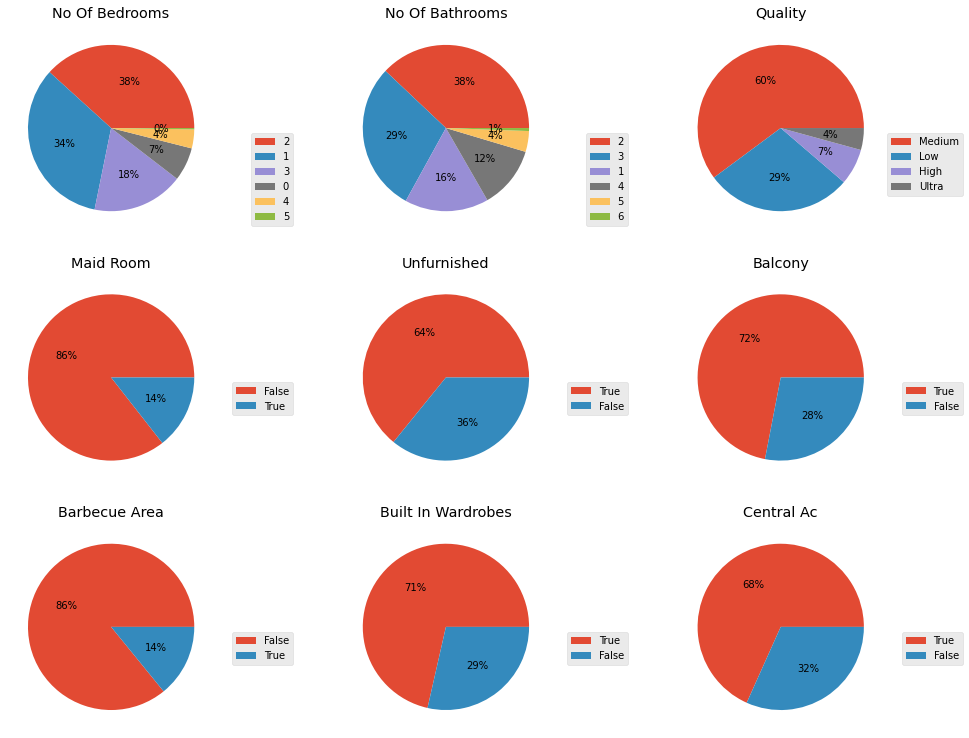

In [ ]:
plt.figure(figsize=(17,13))
for i,title in enumerate(dubai_housing.columns[6:15]):
    plt.subplot(3,3,i+1)
    legend = list(dubai_housing.loc[:,title].value_counts().index)
    plt.pie(dubai_housing.loc[:,title].value_counts(),autopct='%1.0f%%')
    plt.title(title.title().replace('_'," "))
    plt.legend(legend, loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))
plt.show()

* From this we can see that the most common quality of homes are the medium quality ones.
* Of which, 2 bedrooms and 2 bathrooms have a higher proportion compared to the rest.
* Most homes do not have maid rooms, are more likely to be furnished and are more likely to have a balcony.
* We can speculate that only high and ultra quality homes could have a barbecue area.
* It is also very common for homes to have built in warddrobes and a central Ac.

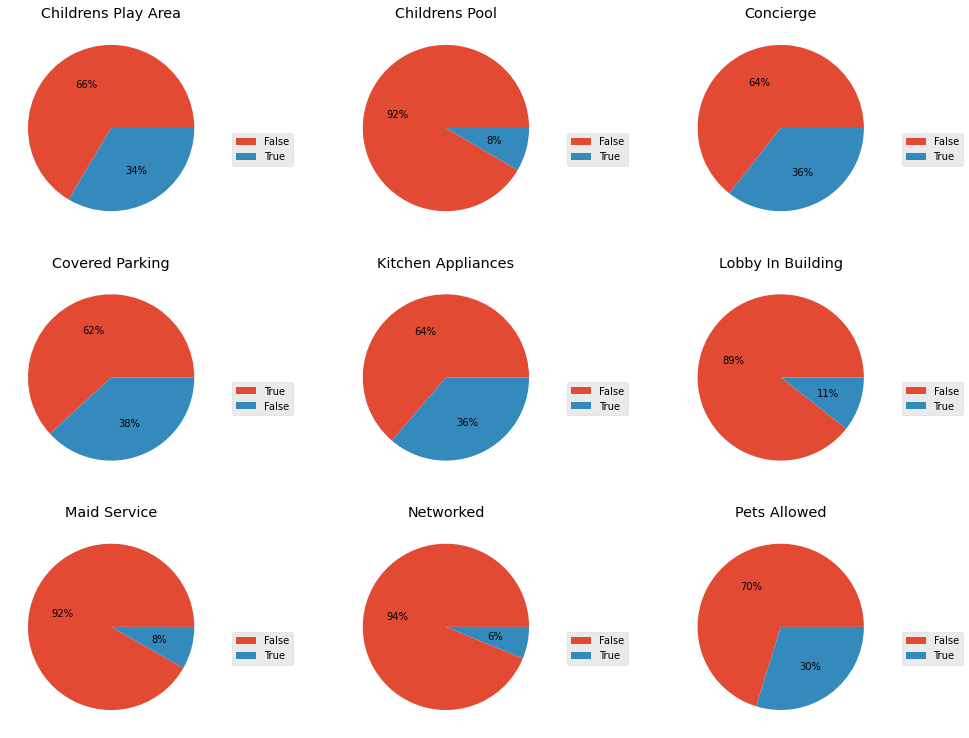

In [ ]:
plt.figure(figsize=(17,13))
for i,title in enumerate(dubai_housing.columns[15:24]):
    plt.subplot(3,3,i+1)
    legend = list(dubai_housing.loc[:,title].value_counts().index)
    plt.pie(dubai_housing.loc[:,title].value_counts(),autopct='%1.0f%%')
    plt.title(title.title().replace('_'," "))
    plt.legend(legend, loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))
plt.show()

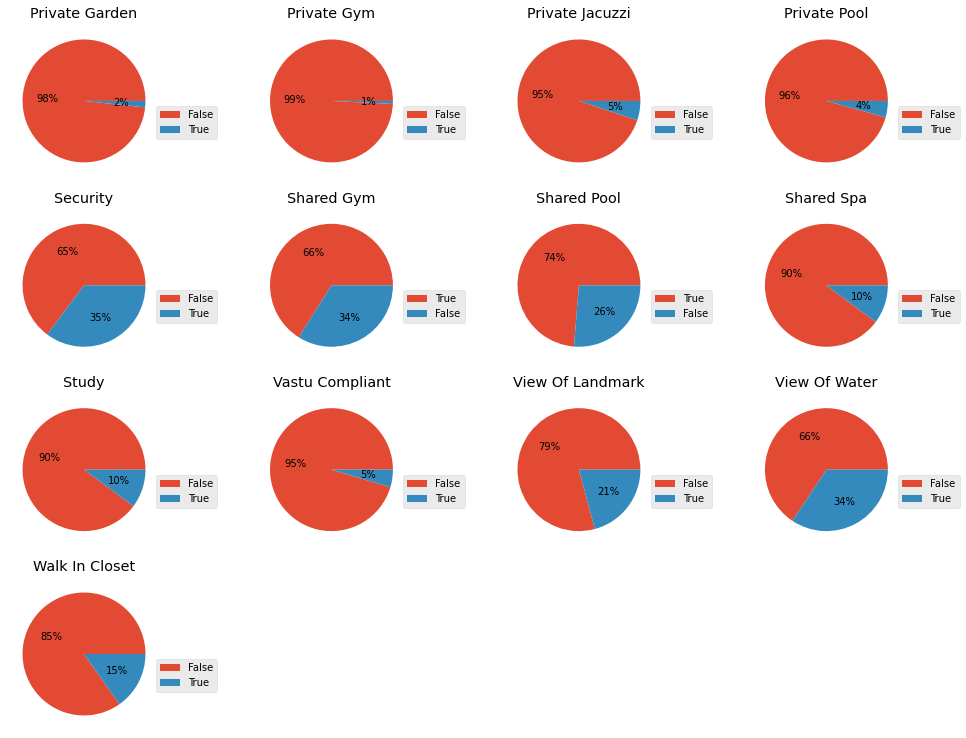

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(17,13))
for i,title in enumerate(dubai_housing.columns[24:]):
    plt.subplot(4,4,i+1)
    legend = list(dubai_housing.loc[:,title].value_counts().index)
    plt.pie(dubai_housing.loc[:,title].value_counts(),autopct='%1.0f%%')
    plt.title(title.title().replace('_'," "))
    plt.legend(legend, loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))
plt.show()

# Data Conversions

In [ ]:
# Convert TRUE/FALSE values to 1 and 0
for col in dubai_housing.columns[9:]:
  dubai_housing[col] = dubai_housing[col]*1 
dubai_housing.head(10)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0
6356784,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0
6356790,Palm Jumeirah,25.114275,55.139764,8503600,2062,4123.96,2,3,High,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1
6356797,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0
6376886,Palm Jumeirah,25.106668,55.149275,2100000,2186,960.66,3,3,Low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert Quality column: Low == 1, Medium == 2, High == 3, Ultra == 4
dubai_housing["quality"].replace({"Low": 1, "Medium": 2, 'High': 3, 'Ultra': 4}, inplace=True)
dubai_housing.sample(5)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7651956,Jumeirah Village Circle,25.046296,55.200783,965789,1313,735.56,2,3,4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1
7645208,Jumeirah Beach Residence,25.083858,55.138714,5750000,2574,2233.88,3,4,2,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7590815,Jumeirah Beach Residence,25.076319,55.133627,1849000,3003,615.72,3,3,2,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
7617943,Dubai Creek Harbour (The Lagoons),25.195295,55.365799,740000,725,1020.69,1,1,2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1
7697243,Dubai Healthcare City,25.208435,55.315582,558000,325,1716.92,1,1,4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1


# Calculate some descriptive statistics

In [ ]:
# descriptive statistics for continuous variables
dubai_housing.describe() 

,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
count,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.00000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861,1.869816,0.144357,0.641470,0.719685,0.141207,0.714436,0.682940,0.335433,0.084514,0.35643,0.618373,0.362730,0.105512,0.082415,0.061942,0.297638,0.016798,0.007874,0.050919,0.043045,0.352231,0.660367,0.737008,0.101837,0.101312,0.046194,0.208399,0.343307,0.152231
std,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117,0.713655,0.351544,0.479695,0.449271,0.348327,0.451801,0.465453,0.472266,0.278231,0.47907,0.485913,0.480914,0.307292,0.275068,0.241114,0.457339,0.128547,0.088409,0.219889,0.203011,0.477791,0.473709,0.440374,0.302514,0.301821,0.209961,0.406270,0.474938,0.359339
min,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# descriptive statistics for categorical variables only
dubai_housing.describe(include ='O')

,neighborhood
count,1905
unique,54
top,Downtown Dubai
freq,302


In [ ]:
dubai_housing.neighborhood.value_counts().nunique()

31

We have 31 different neighborhoods

# Plot histograms for continuous variables

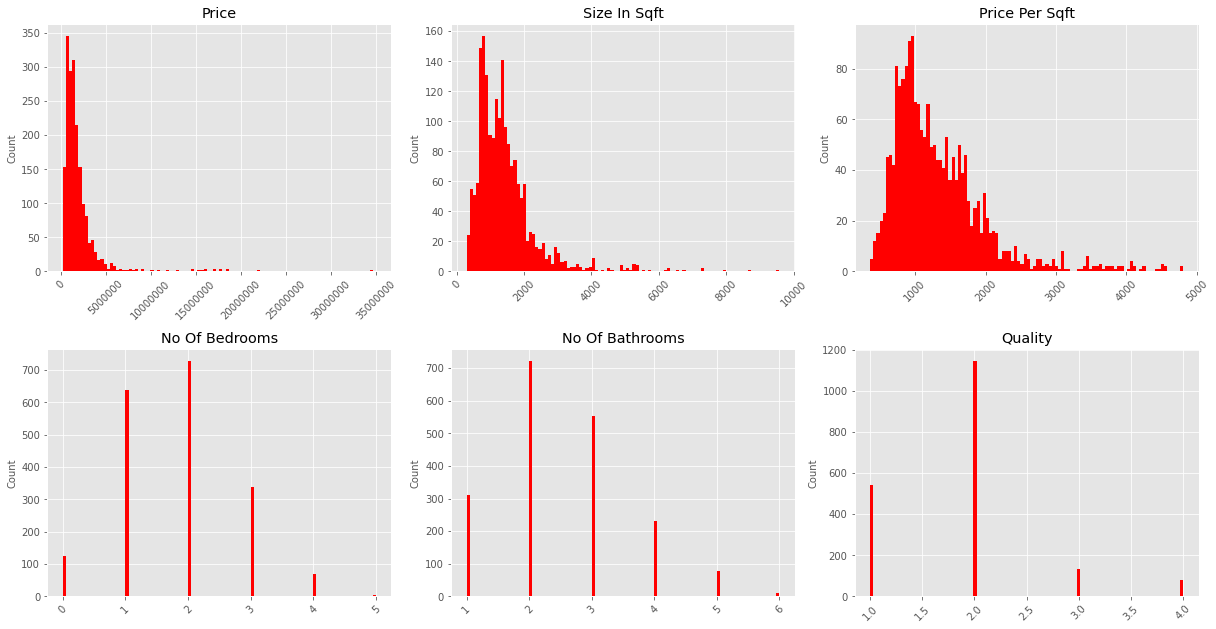

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(17,13))
for i,title in enumerate(dubai_housing.columns[3:9]):
    plt.subplot(3,3,i+1)
    plt.hist(dubai_housing.loc[:,title],bins = 100,color = ['red'])
    plt.ylabel('Count',fontsize = 10)
    plt.title(title.title().replace('_'," "))
    plt.xticks(fontsize=10, rotation = 45)
    plt.ticklabel_format(style = 'plain')
plt.tight_layout()
plt.show()

* Looking at the distributions of the first three graphs, we can see that all three continuous variables are skewed to the right. This means that there are more outliers towards the left of the distribution. These could be the super quality housing units that are sold for a very high price and have a lot of added features included in the housing unit.
* Apart from that, we can see that the 2 is the most common value for the number of bedrooms, bathrooms and the quality level. A quality level of 2 implies a medium level of quality.

# Perform logarithmic transformation

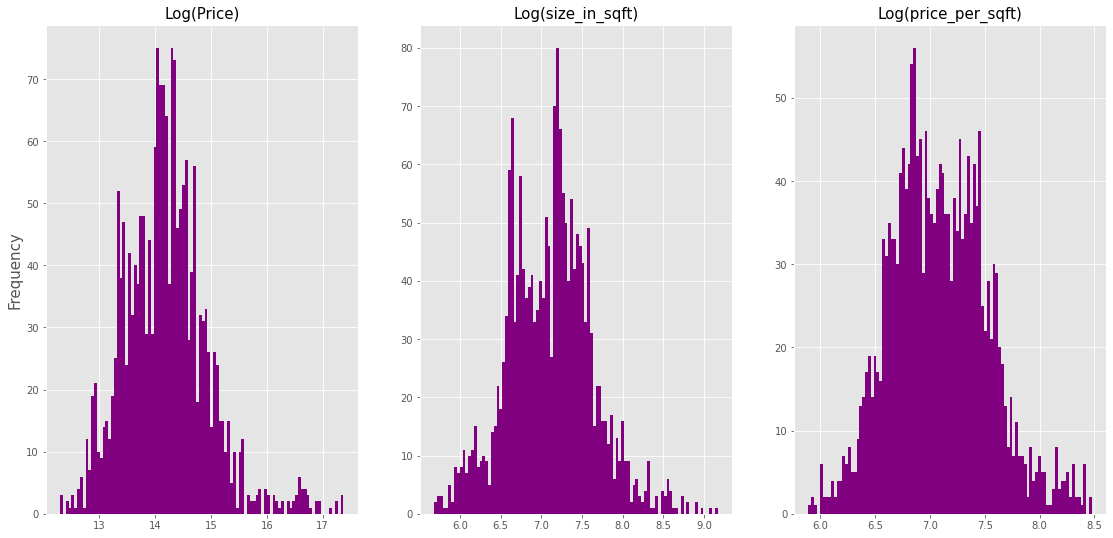

In [ ]:
temp = np.log(dubai_housing.iloc[:,3:6])

plt.figure(figsize=(19,9))

# histograms to show effects of log transformation
plt.subplot(1,3,1)
plt.hist(temp.iloc[:,0],bins = 100,color = 'purple') #after
plt.title('Log(Price)',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

plt.subplot(1,3,2)
plt.hist(temp.iloc[:,1],bins = 100,color = 'purple') #after
plt.title('Log(size_in_sqft)',fontsize = 15)

plt.subplot(1,3,3)
plt.hist(temp.iloc[:,2],bins = 100,color = 'purple') #after
plt.title('Log(price_per_sqft)',fontsize = 15)
plt.show()


* After we performed the logarithmic transformation of price, size in square feet and price per square feet, we somewhat normalized the variance and the distribution of these variables somewhat a resembles a normal distribtuion.

# Correlation Heatmap for Continuous Variables

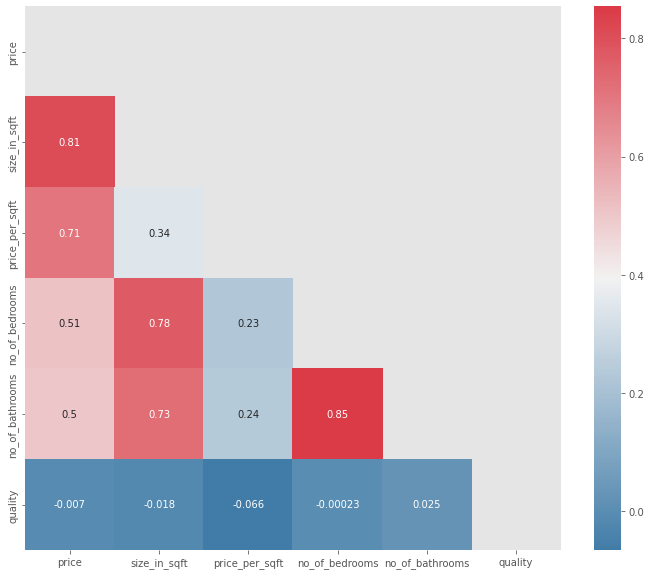

In [ ]:
# plot a correlation matrix for the variables of interest
corr = dubai_housing[dubai_housing.columns[3:9]].corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

* From this we can see that price is highly and positively correlated with size_in_sqft and price_per_sqft. It would make sense to either use price_per_sqft OR price as our dependent variable if we are going to run a regression.
* Likewise, size_in_sqft is also highly and positvely correlated with no_of_bedrooms and no_of_bathrooms. This makes intuitive sense the larger the size of the housing unit, the more bedrooms and bathrooms it can have.
* The number of bedrooms is also highly and positively correlated with the number of bathrooms. This is also makes intuitive sense since more bedrooms could imply more bathrooms as some bedrooms could be master bedrooms that almost certainly have a bathroom inside them.

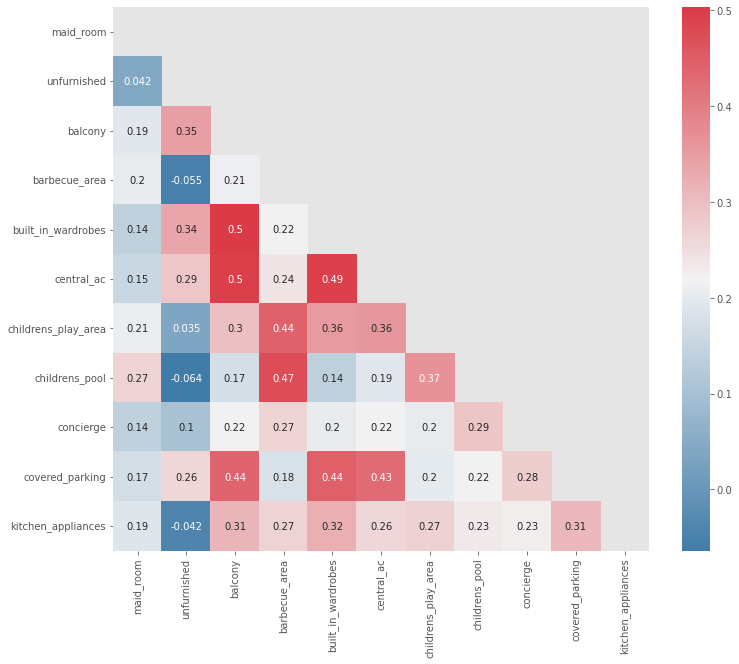

In [ ]:
corr = dubai_housing[dubai_housing.columns[9:20]].corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

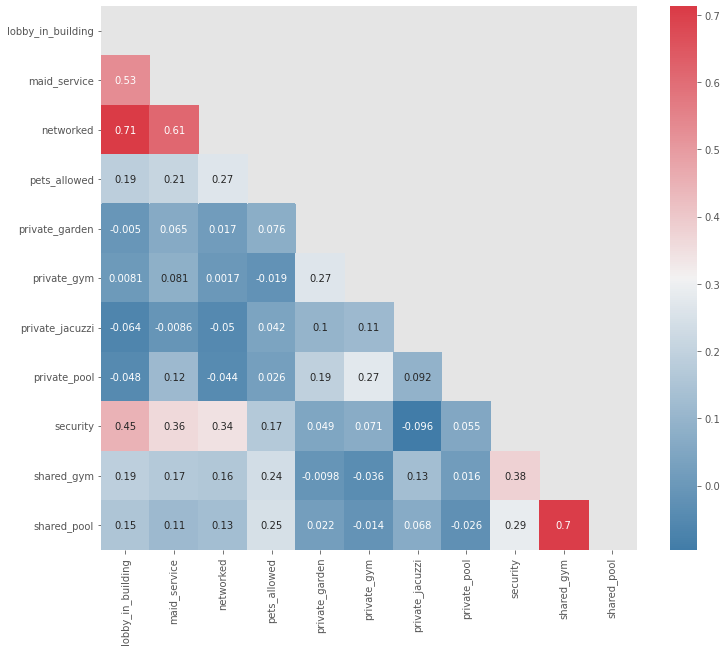

In [ ]:
corr = dubai_housing[dubai_housing.columns[20:31]].corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Variance Inflation Factor to check if we have a multicollinearity problem

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = dubai_housing[dubai_housing.columns[4:]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
4,quality,34.310096
3,no_of_bathrooms,24.335518
2,no_of_bedrooms,21.734862
0,size_in_sqft,10.586648
26,shared_pool,10.134395
25,shared_gym,7.195780
7,balcony,6.824740
9,built_in_wardrobes,6.599788
1,price_per_sqft,6.210976
10,central_ac,5.969525


* From the dataframe above we can see that the variables: shared_pool, quality no_of_bathrooms, no_of_bedrooms, size_in_sqft have Variance Inflation Factors that are greater than 10. Including all of these features into any regression or machine learning model will create issues with multicollinearity whereby the standard errors of the beta coefficients for these variables will be inflated and this may lead to problems with establishing significance.
* It will be best to either drop some of these variables or include the ones that have a VIF score of at most 11.
* All of the binary variables display a VIF score of less than 10 signifying that we do not have a multicollinearity problem if we include them in our machine learning problem.
* Nonetheless, we anticipate using a dimensionality reduction method (like a PCA) to reduce the number of correlated features into fewer independent factors that explain the same variance.

# Now we will do some exploratory data analysis to see some interesting things about the data.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


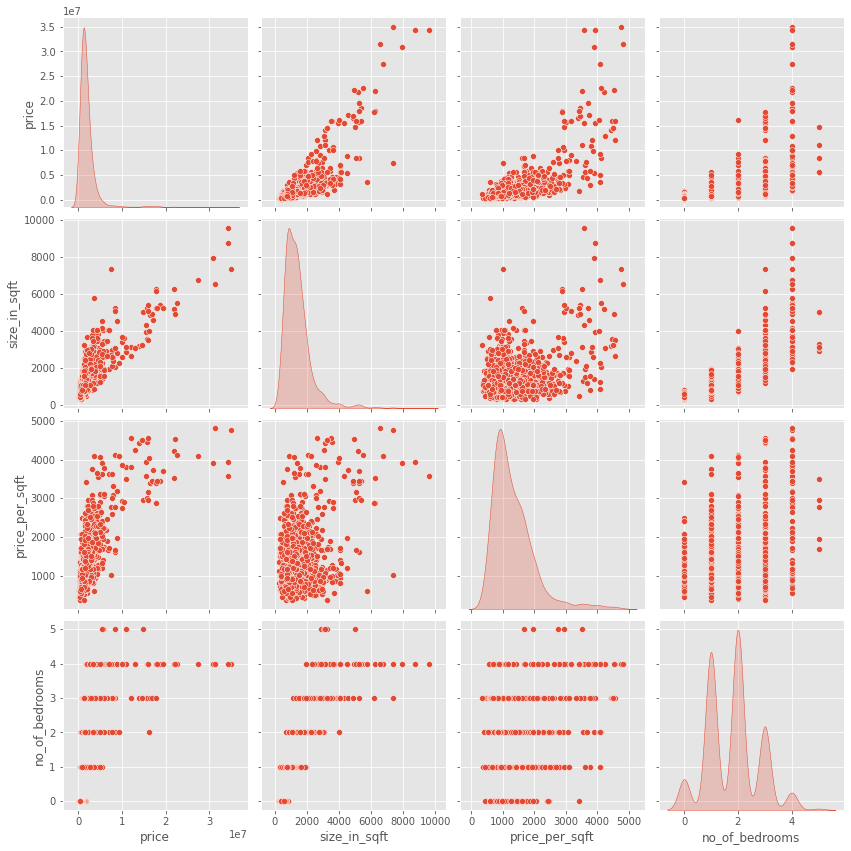

In [ ]:
# Scatter Matrix to see relationships amongst the data
sns.pairplot(dubai_housing[dubai_housing.columns[3:7]],palette="Set2", diag_kind="kde", size=3)

# Top 10 Most Expensive Neighborhoods

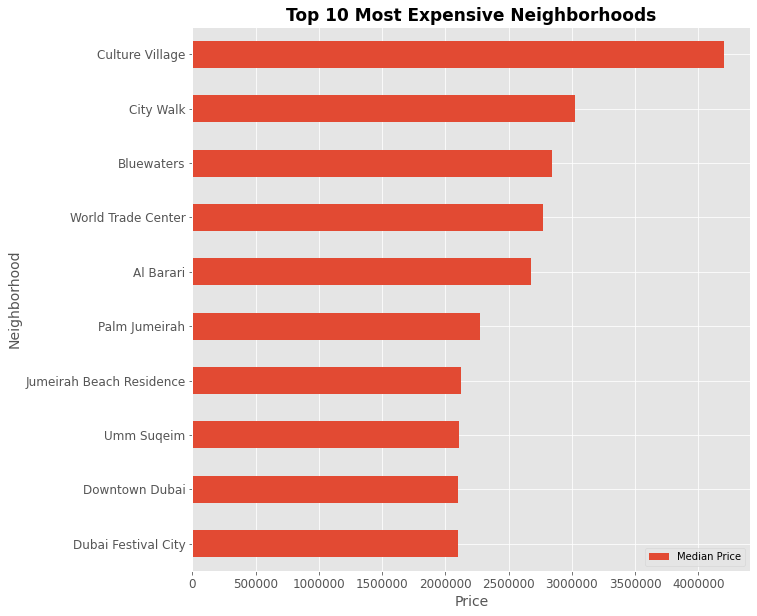

In [ ]:
neighborhood_median = dubai_housing.groupby('neighborhood')[['neighborhood','price']].median()

import matplotlib.ticker as ticker # to change the ticker and the scale of the y axis
fig,ax = plt.subplots() # subplots tuple object
neighborhood_median['price'].sort_values(ascending=False)[:10].plot.barh(ax=ax,figsize=(10,10)) # bar containers
ax.set_title('Top 10 Most Expensive Neighborhoods',size=17,loc='center',fontweight = 'bold') # title
ax.set_ylabel('Neighborhood',size=14) # y label
ax.set_xlabel('Price',size=14) # x label
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f')) # change y-axis ticker label format
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=12) # change ticker label size
ax.legend(['Median Price'])
plt.show()

In [ ]:
link = "https://drive.google.com/file/d/12u0bvnwMaNjQ29sipehIXCn3-RWxfdFm/view?usp=sharing"

# download google drive's csv file onto colab
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('file0.csv')

# downloaded csv into geopandas dataframe
dubai_map = gpd.read_file('file0.csv',low_memory = False)

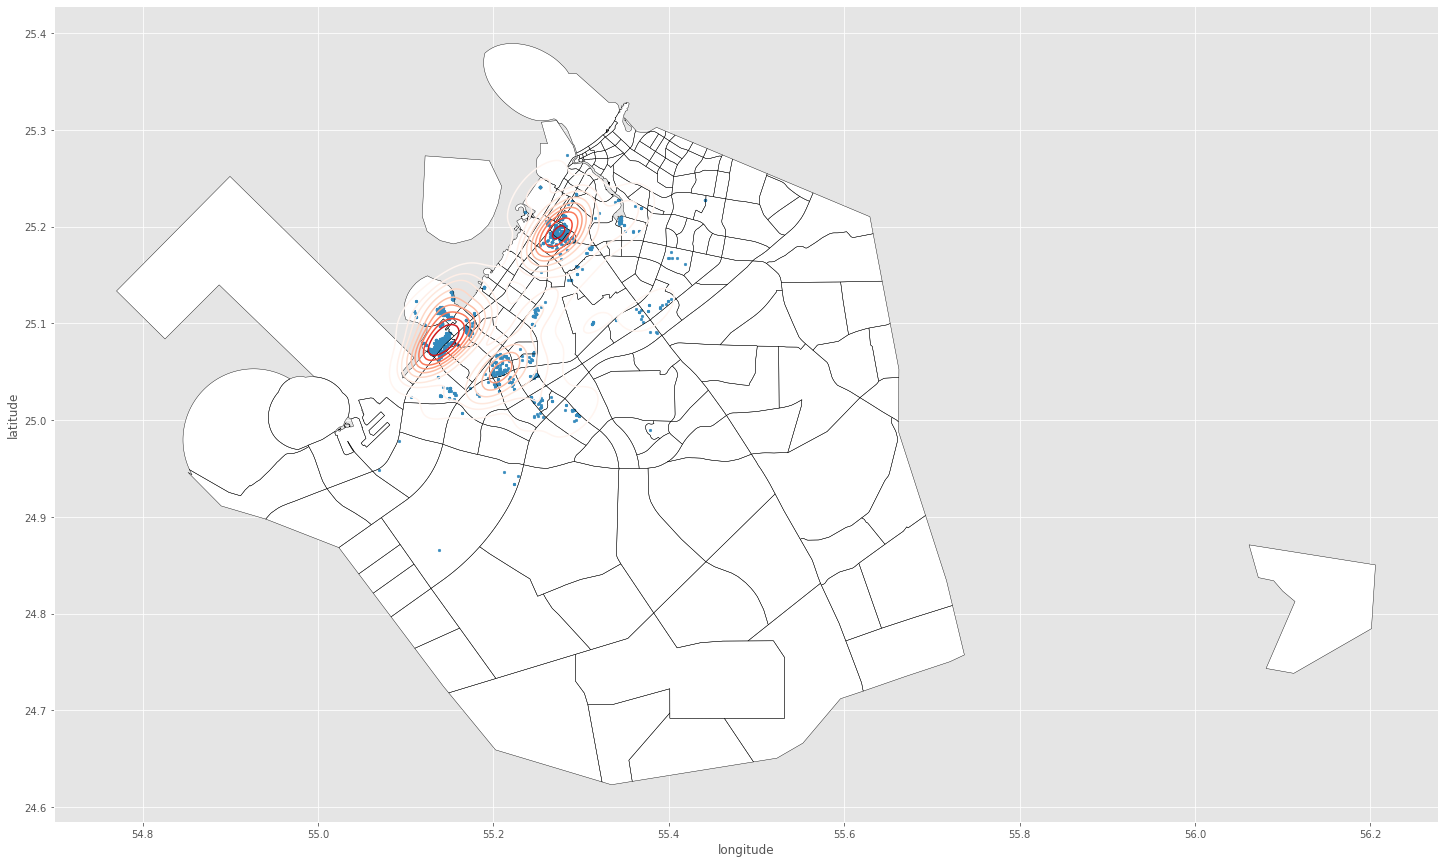

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

# Boundary
dubai_map.boundary.plot(ax=ax, color='Black', linewidth=.4)
dubai_map.plot(ax=ax,color = 'white',figsize=(25,15))

# Scatter plot each house listing based on the geo coordinates
dubai_housing.plot (kind='scatter',
                   x = 'longitude', 
                   y = 'latitude',
                   figsize = (25,15),
                   s = 7,
                   alpha = 1,
                   ax = ax)
# Kernal Density Plot
sns.kdeplot(x=dubai_housing.longitude, y=dubai_housing.latitude, 
            gridsize=200, n_levels=10, 
            shade=False, alpha = 1,
            cmap=plt.cm.Reds,
            thresh=0.05, 
            ax = ax)

* Based on this graph we can see visually see that there is a large density of housing units in Downtown Dubai, Dubai Marina and Jumeirah Village Circle and Palm Jumeirah - which are also neighborhoods which are either adjacent to each other or somewhat close to each other.
* This can be seen through the scatter points and red contour lines indicating that most properties are sold in the densely populated and business districts of Dubai.

In [ ]:
dubai_housing.neighborhood.value_counts()[:10]

Downtown Dubai              302
Dubai Marina                288
Jumeirah Village Circle     200
Palm Jumeirah               178
Jumeirah Beach Residence    116
Business Bay                 97
Jumeirah Lake Towers         70
Dubai Hills Estate           53
The Views                    47
Jumeirah                     39
Name: neighborhood, dtype: int64

# Geo graph based on the quality of the housing unit

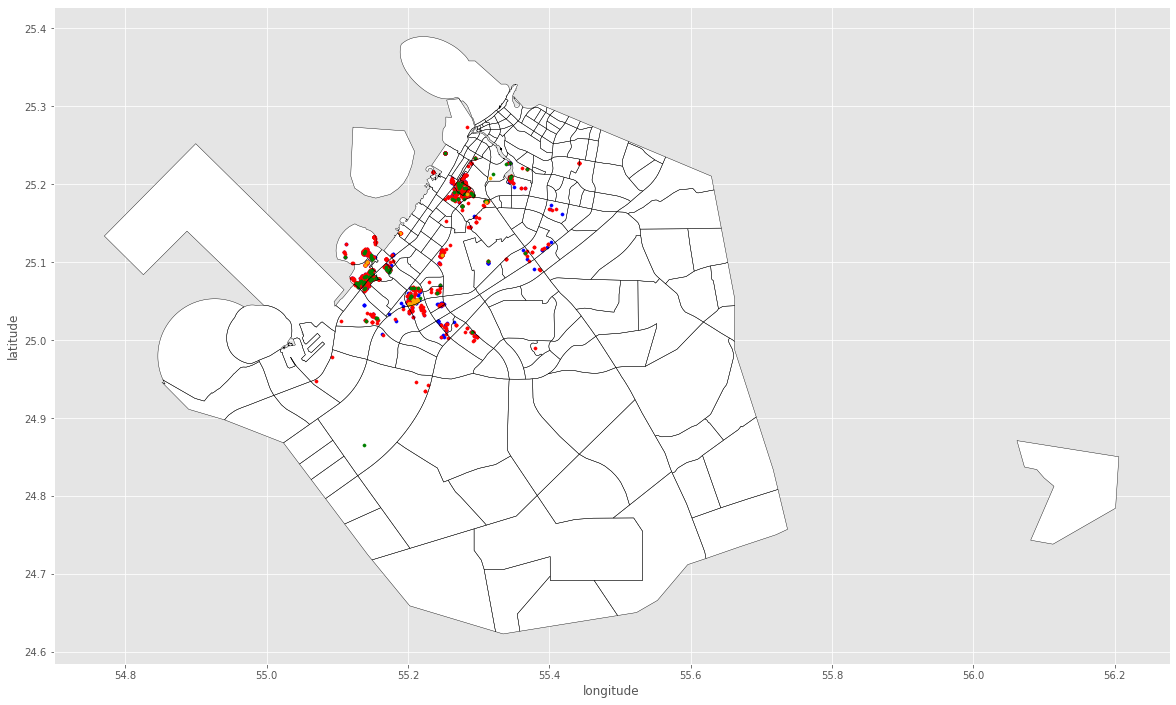

In [ ]:
fig = plt.figure(1, figsize=(20,20)) 
ax = fig.add_subplot()

# Dataframe for each quality type
df_low = dubai_housing.loc[dubai_housing['quality'] == 1]
df_medium = dubai_housing.loc[dubai_housing['quality'] == 2]
df_high = dubai_housing.loc[dubai_housing['quality'] == 3]
df_ultra = dubai_housing.loc[dubai_housing['quality'] == 4]

# Boundary
dubai_map.boundary.plot(ax=ax, color='Black', linewidth=.4)
boundary = dubai_map.plot(ax=ax,color = 'white',figsize=(25,15))

args = dict(kind='scatter',
    x = 'longitude',
    y = 'latitude',
    figsize = (20, 20),
    s = 10,
    alpha = 1)

plot1 = df_low.plot(color='blue', 
                          kind='scatter',
                          x = 'longitude',
                          y = 'latitude',
                          figsize = (20, 20),
                          s = 10,
                          alpha = 1,ax = boundary)

plot2 = df_medium.plot(ax = plot1, color='red', **args)
plot3 = df_high.plot(ax = plot2, color='green', **args)
plot4 = df_ultra.plot(ax = plot3, color='orange', **args)

* From this graph we can see that there are mostly medium and high quality houses in the sample annd they are mostly found in Downtown Dubai, Dubai Marina and Jumeirah Village Circle and Palm Jumeirah - the business/residential areas of Dubai.
* We can also a clear picture of the quantity of each quality type based on the neighborhood in the graph below.



In [ ]:
temp = dubai_housing.groupby(['neighborhood','quality'])[['quality']].count()
temp.rename({'quality':'count'},axis = 1, inplace = True)

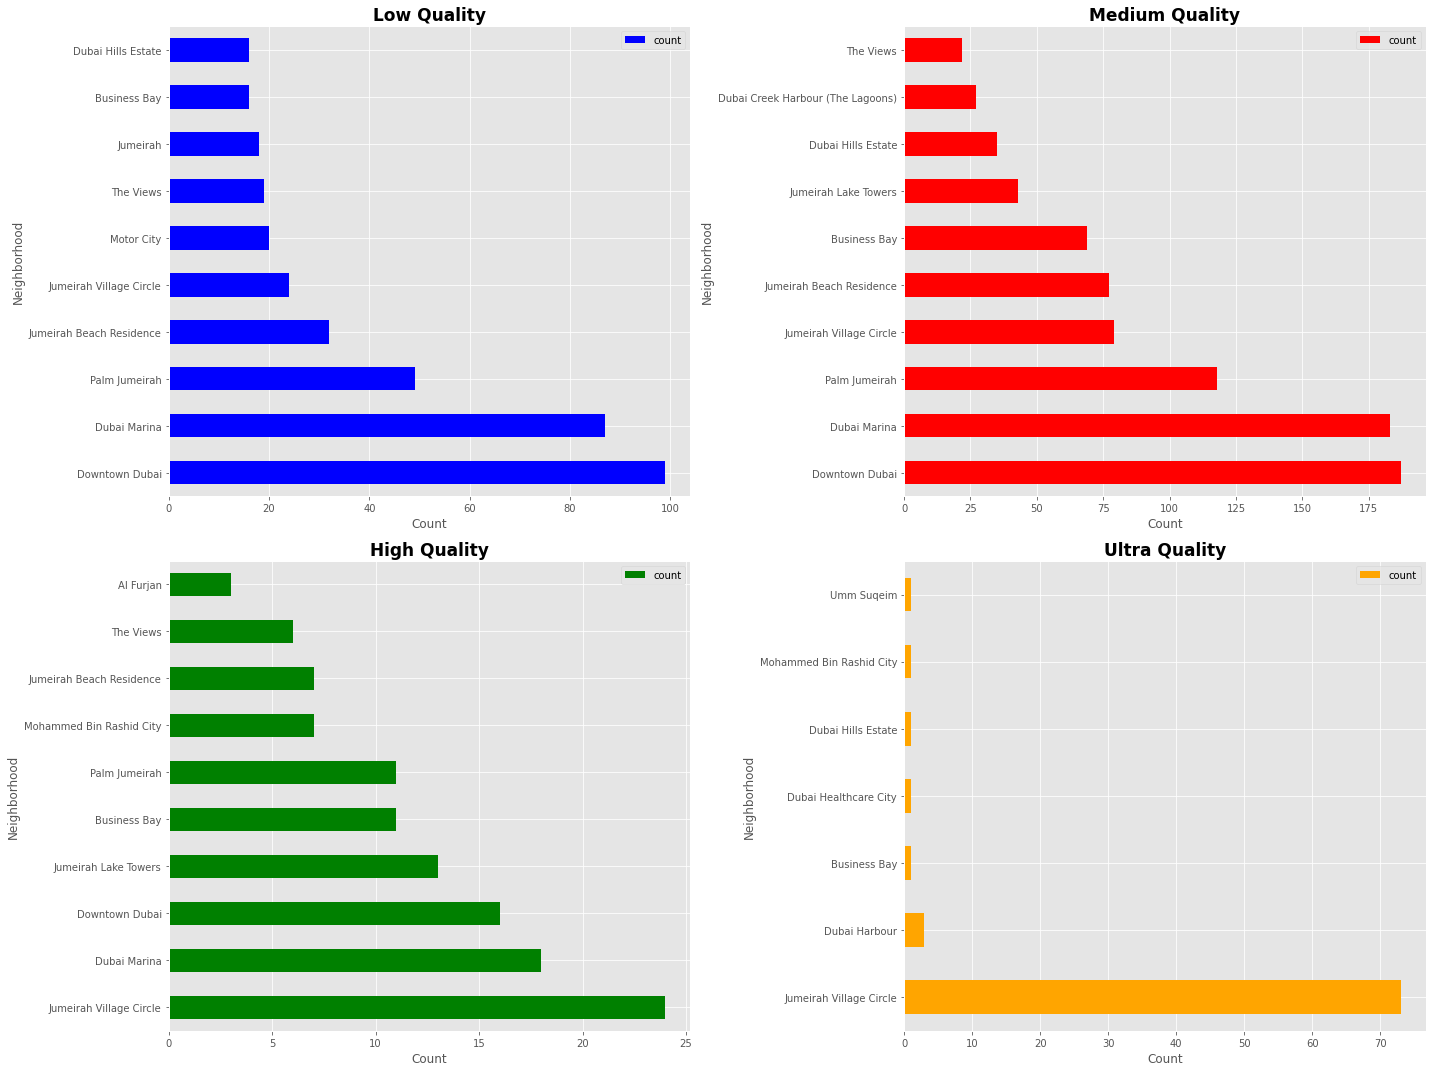

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 15)) # subplots tuple object

# Low Quality
temp.loc[temp.index.get_level_values('quality')==1,'count'].reset_index().set_index('neighborhood').sort_values('count',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[0,0],y='count',color='blue')
ax[0,0].set_title('Low Quality',size=17,loc='center',fontweight = 'bold') # title

# Medium Quality
temp.loc[temp.index.get_level_values('quality')==2,'count'].reset_index().set_index('neighborhood').sort_values('count',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[0,1],y='count',color='red')
ax[0,1].set_title('Medium Quality',size=17,loc='center',fontweight = 'bold') # title

# High Quality
temp.loc[temp.index.get_level_values('quality')==3,'count'].reset_index().set_index('neighborhood').sort_values('count',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[1,0],y='count',color='green')
ax[1,0].set_title('High Quality',size=17,loc='center',fontweight = 'bold') # title

# Ultra Quality
temp.loc[temp.index.get_level_values('quality')==4,'count'].reset_index().set_index('neighborhood').sort_values('count',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[1,1],y='count',color='orange')
ax[1,1].set_title('Ultra Quality',size=17,loc='center',fontweight = 'bold') # title

for ax in ax.flat:
    ax.set(xlabel='Count', ylabel='Neighborhood') # set labels
    ax.tick_params(axis='both', which='major', labelsize=10) # change ticker label size
fig.tight_layout()

* From these set of graphs we can see three things:


1.   Downtown Dubai, Dubai Marina and Palm Jumeirah have a large density of Low and Medium quality houses.
2.   Jumeirah Village Circle has the largest number of Ultra quality homes.
3. Dubai Marina and Downtown Dubai has a good range of home quality types.



# Median Prices Based on Quality and Neighborhood

In [ ]:
temp = dubai_housing.groupby(['neighborhood','quality'])[['price']].median()

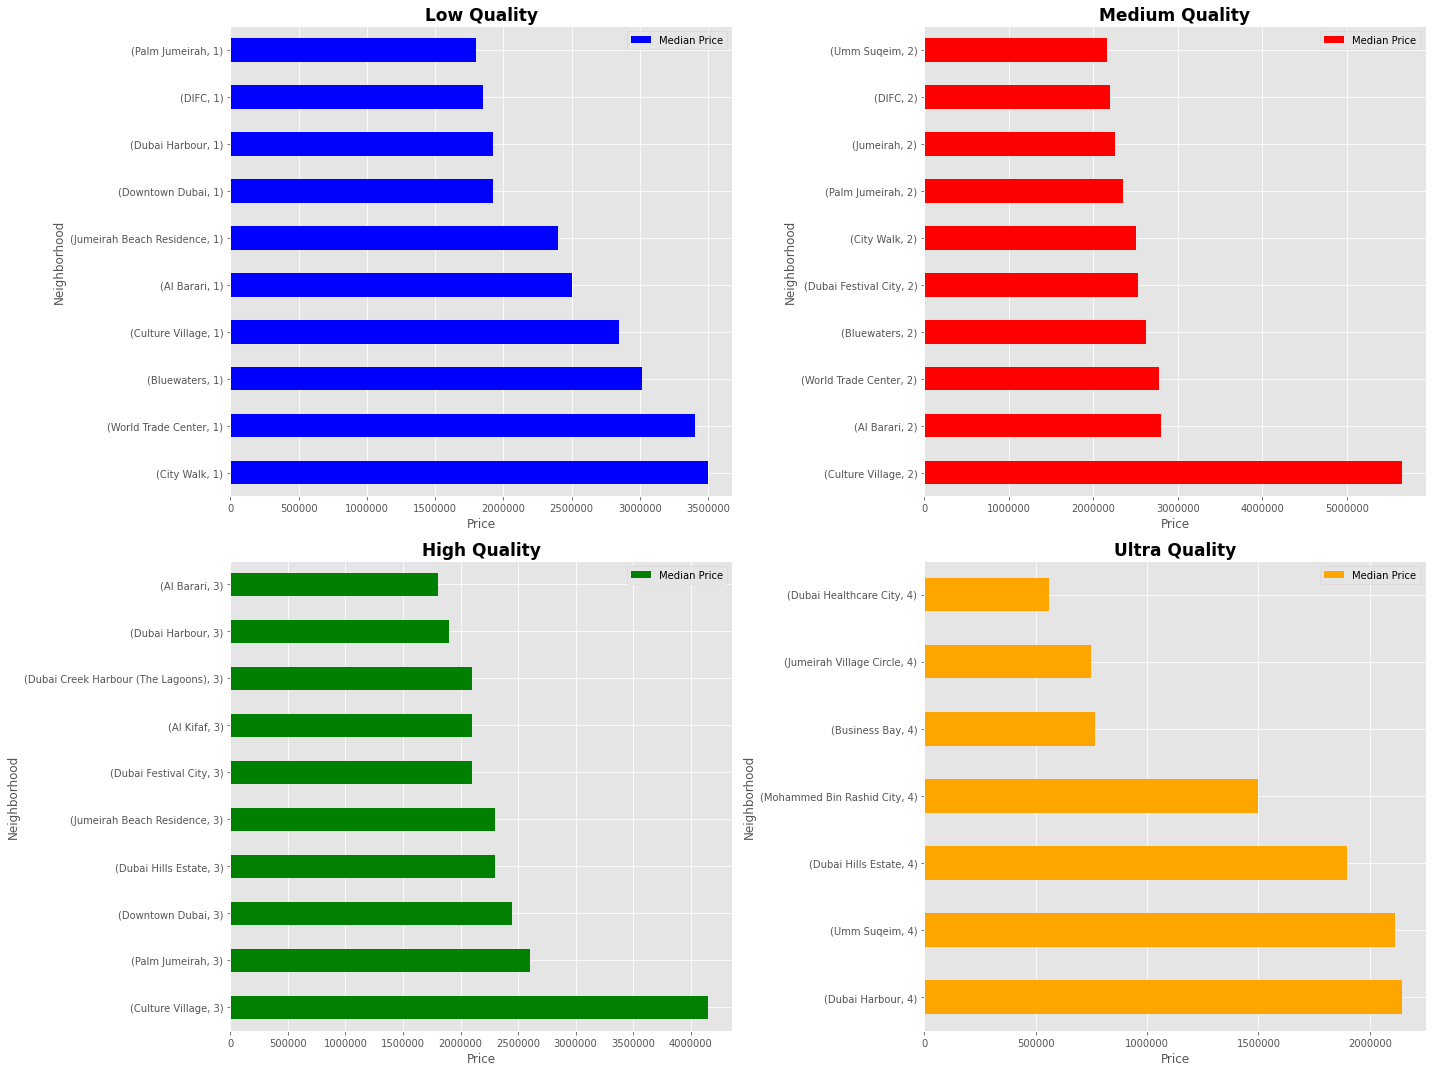

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 15)) # subplots tuple object

# Low Quality
temp.loc[temp.index.get_level_values('quality')==1,'price'].reset_index().set_index(['neighborhood','quality']).sort_values('price',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[0,0],y='price',color='blue')
ax[0,0].set_title('Low Quality',size=17,loc='center',fontweight = 'bold') # title

# Medium Quality
temp.loc[temp.index.get_level_values('quality')==2,'price'].reset_index().set_index(['neighborhood','quality']).sort_values('price',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[0,1],y='price',color='red')
ax[0,1].set_title('Medium Quality',size=17,loc='center',fontweight = 'bold') # title

# High Quality
temp.loc[temp.index.get_level_values('quality')==3,'price'].reset_index().set_index(['neighborhood','quality']).sort_values('price',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[1,0],y='price',color='green')
ax[1,0].set_title('High Quality',size=17,loc='center',fontweight = 'bold') # title

# Ultra Quality
temp.loc[temp.index.get_level_values('quality')==4,'price'].reset_index().set_index(['neighborhood','quality']).sort_values('price',
                                                                                                                ascending=False)[:10].plot.barh(ax=ax[1,1],y='price',color='orange')
ax[1,1].set_title('Ultra Quality',size=17,loc='center',fontweight = 'bold') # title

for ax in ax.flat:
    ax.set(xlabel='Price', ylabel='Neighborhood') # set labels
    ax.tick_params(axis='both', which='major', labelsize=10) # change ticker label size
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f')) # change y-axis ticker label format
    ax.legend(['Median Price'])
fig.tight_layout()

* From the 1st graph we can see that for low quality houses, Blue Waters, World Trade Center and City Walk have the most expensive low quality houses in terms of median price.
* From the second graph, Culture Village, Al Barari and World Trade Center are the most expensive neighborhoods for medium quality homes.
* From the third graph, Culture Village, Palm Jumeirah and Downtown Dubai are the most expensive for neighborhoods for High Quality homes.
* From the 4th graph we can see that Dubai Harbour, Umm Suqeim and Dubai Hills Estate are the most expensive neighborhoods for Ultra quality homes.

# Predict Housing Prices using OLS

In [ ]:
from sklearn import linear_model # library for multiple linear regression
from sklearn.metrics import mean_squared_error # to get the RMSE score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# Perform Logarithmic Transformations
dubai_housing['log_price'] = np.log(dubai_housing['price'])
# dubai_housing['log_size'] = np.log(dubai_housing['size_in_sqft'])
# dubai_housing['log_price_per_sqft'] = np.log(dubai_housing['price_per_sqft'])

In [ ]:
# Dependent Variable
y = dubai_housing['log_price']

temp = dubai_housing.copy() # create a copy of the main dataframe

# drop unwanted columns
to_drop = ['neighborhood', 'latitude', 'longitude', 'log_price', 'log_price_per_sqft','quality','no_of_bathrooms','price','price_per_sqft','log_size'] 
temp.drop(to_drop,axis = 1,inplace = True)

# Independent Variables
X = dubai_housing[temp.columns]

In [ ]:
regr = linear_model.LinearRegression() # linearRegression function from linear_model
temp2 = regr.fit(X,y) # use fit method 
rSquared = regr.score(X,y) #0.6427

In [ ]:
# betas = regr.coef_ # slopes
# yInt = regr.intercept_  # y-intercept

# yHat = yInt + betas[0]*X[:,0] + betas[1]*X[:,1] + betas[2]*X[:,2] + betas[0]*X[:,0] + betas[0]*X[:,0] + betas[0]*X[:,0] + betas[0]*X[:,0] + betas[0]*X[:,0] + betas[0]*X[:,0] 

# # RMSE =  mean_squared_error(y, y_hat, squared=False)
# len(betas)

In [ ]:
# regression summary 
X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              644.7
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                        0.00
Time:                        03:23:56   Log-Likelihood:                         -5448.9
No. Observations:                1905   AIC:                                  1.096e+04
Df Residuals:                    1875   BIC:                                  1.112e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

* Based on the regression output, we can see that we have an R-squared of 80%. This is mostly because we have included a lot of factors in our model, as such, the R-squared is very inflated.
* Not only that, several features have a p-value of the t-statistic higher than alpha = 0.05, meaning that these features are statistically insignificant in explaining the variance in housing prices.
* We also expected all coefficients in the econometric model to be positive but most of them turned out to be negative.
* We will now drop the statistically insignificant variables and compute the model again.

In [ ]:
# Dependent Variable
y = dubai_housing['price']

temp = dubai_housing.copy() # create a copy of the main dataframe

# drop unwanted columns
to_drop = ['neighborhood', 'latitude', 'longitude', 'log_price', 'log_price_per_sqft','quality','no_of_bathrooms',
           'price','price_per_sqft','log_size','balcony','built_in_wardrobes','barbecue_area','central_ac','childrens_pool','covered_parking','kitchen_appliances',
           'networked','private_garden','private_gym','private_jacuzzi','shared_gym','shared_spa','study','vastu_compliant','walk_in_closet','childrens_play_area'] 
temp.drop(to_drop,axis = 1,inplace = True)

# Independent Variables
X = dubai_housing[temp.columns]

In [ ]:
# regression summary 
X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              591.2
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                        0.00
Time:                        03:24:09   Log-Likelihood:                         -29908.
No. Observations:                1905   AIC:                                  5.984e+04
Df Residuals:                    1892   BIC:                                  5.991e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

* Again, we did not expect the beta coefficients to be negative since, for instance, we expected that on average, a home with security would have a higher percentage increase in price as compared to a home without security, while controlling for the other factors. This goes for the rest of the categorical variables as well.
* We still have a multicollinearity problem and our R-squared got reduced since we dropped a lot of variables. Though, our model is no longer overfitting the data.

# Clustering

In [ ]:
# Building our clustering and classification model
temp = dubai_housing.copy() # create a copy of the main dataframe

# drop unwanted columns
to_drop = ['neighborhood', 'latitude', 'longitude', 'log_price', 'log_size', 'log_price_per_sqft','quality'] 
temp.drop(to_drop,axis = 1,inplace = True)

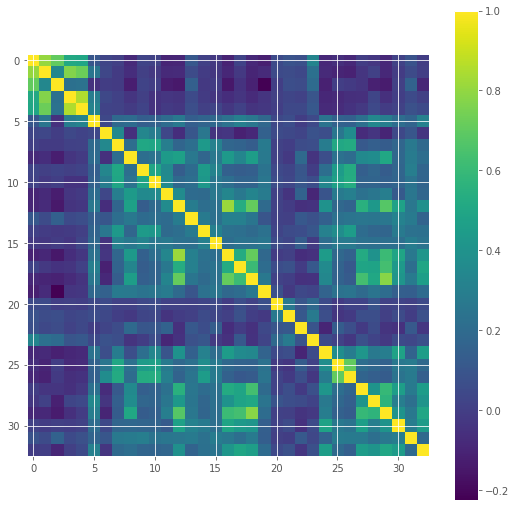

In [ ]:
outcomes = dubai_housing['quality'].to_numpy() # the outcome variable, quality
predictors = temp.to_numpy() # predictors

# To ascertain whether a PCA is indicated, let's look at the correlation heatmap
r = np.corrcoef(predictors,rowvar=False)
plt.figure(figsize=(9,9))
plt.imshow(r) 
plt.colorbar()
plt.show()

In [ ]:
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

Text(0, 0.5, 'Eigenvalues')

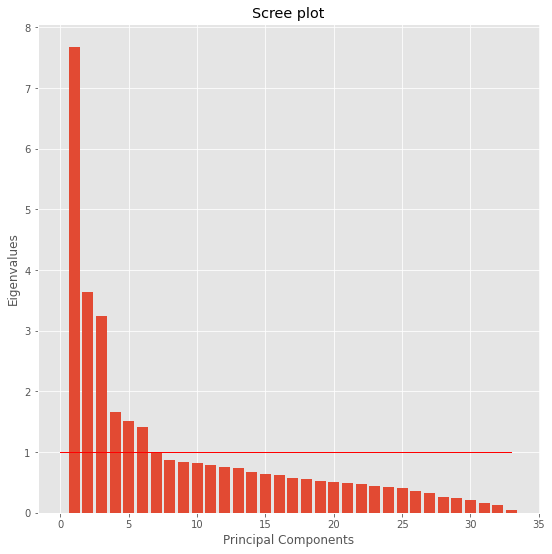

In [ ]:
zscoredData = stats.zscore(predictors) # standardize the data
pca = PCA() # Instantiate PCA object
pca.fit(zscoredData) # fit the zscored data
eigValues = pca.explained_variance_  # eigen values
loadings = pca.components_ # loadings
origDataNewCoordinates = pca.fit_transform(zscoredData) # old data in the PCA space

# Use the Scree Plot to determine how factors we have
numPredictors = len(temp.columns) # how many predictors we have 
plt.figure(figsize=(9,9))
plt.bar(np.linspace(1,numPredictors,numPredictors),eigValues)
plt.plot([0,numPredictors],[1,1],color='red',linewidth=1) # Kaiser criterion line
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')

* Based on the scree plot, we can see that the first two principal components explain most of the variance.

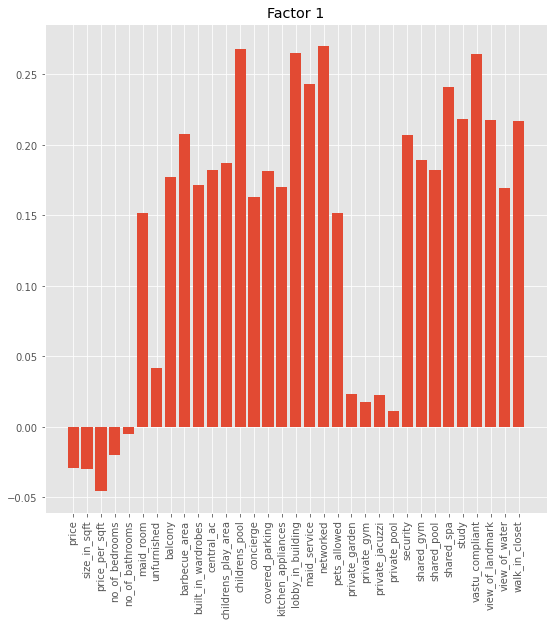

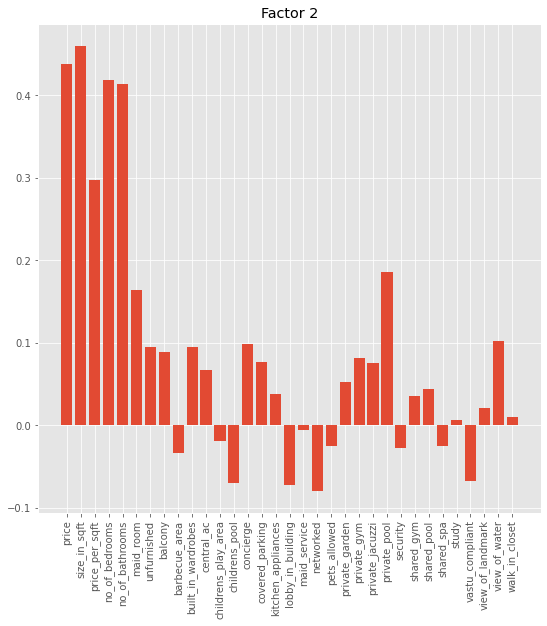

In [ ]:
# Look at loadings of the first factor
plt.figure(figsize=(9,9))
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[0,:],
        tick_label = temp.columns
        )
plt.title('Factor 1')
plt.xticks(fontsize=10, rotation=90)
plt.show() 

# Look at loadigns of the second factor
plt.figure(figsize=(9,9))
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[1,:],
        tick_label = temp.columns
        )
plt.title('Factor 2')
plt.xticks(fontsize=10, rotation=90)
plt.show() 

* Based on the loadings from the first factor we can define the first principal component as additional features.
* Based on the loadings from the second factor, we can define the second principal component as price + size of property.

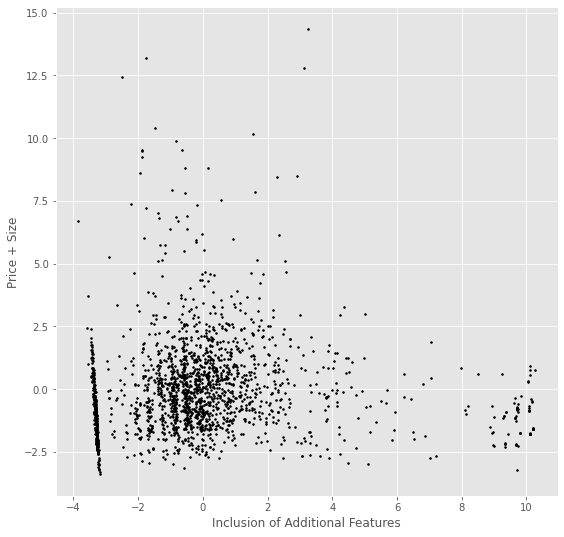

In [ ]:
# Old data in the PCA space
plt.figure(figsize=(9,9))
plt.plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],'.',markersize=3,color='black')
plt.xlabel('Inclusion of Additional Features')
plt.ylabel('Price + Size')
plt.show()

Text(0, 0.5, 'Sum of silhouette scores')

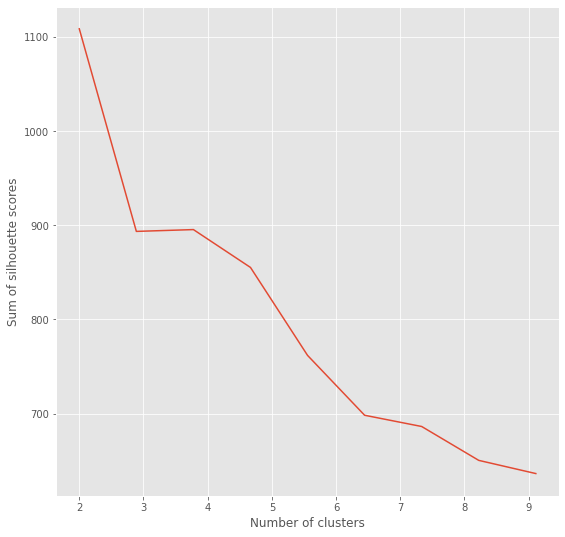

In [ ]:
# Clustering Procedure
X = np.transpose(np.array([origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],origDataNewCoordinates[:,2]]))

numClusters = 10 # how many clusters are we looping over? (from 2 to 4)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Compute kMeans:
for ii in range(2,numClusters + 1): # Loop through each cluster
    kMeans = KMeans(n_clusters = int(ii)).fit(X)
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take sum
plt.figure(figsize=(9,9))
plt.plot(np.linspace(2,numClusters,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores') # 2 clusters has the highest silhouette score

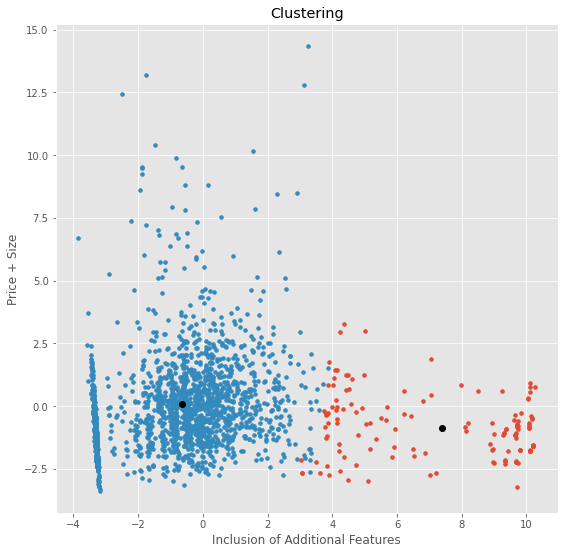

In [ ]:
numClusters = 2 # correct clusters
Q = np.empty([numClusters,1]) 
Q[:] = np.NaN 

# Compute kMeans:
for ii in range(2,numClusters + 1): 
    kMeans = KMeans(n_clusters = int(ii)).fit(X)
    cId = kMeans.labels_
    cCoords = kMeans.cluster_centers_ 

# plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId)))
plt.figure(figsize=(9,9))
for ii in indexVector:
    plotIndex = np.argwhere(cId == int(ii-1))
    plt.plot(origDataNewCoordinates[plotIndex,0],origDataNewCoordinates[plotIndex,1],'o',markersize=3.5)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=6,color='black')  
    plt.xlabel('Inclusion of Additional Features')
    plt.ylabel('Price + Size')
    plt.title('Clustering')

* The clustering model needs revision or the data itself does not group well.
* Other than that, we based on the sum of silhouette scores, we can see that 2 is the optimal k value.
* Using this value, we can see that we have two clusters after performing the PCA and reducing the dimensions of the data. Though, it doesnt seem very accurate and no conclusion can be made.